In [1]:
import shutil

In [2]:
# shutil.move('C:/Users/i7B/Downloads/자동차등록집계현황.csv','자동차등록집계현황.csv')
# shutil.move('C:/Users/i7B/Downloads/교통사고집계현황.csv','교통사고집계현황.csv')

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False)
%config InlineBackend.figure_format = 'retina'

In [4]:
df=pd.read_csv('자동차등록집계현황.csv',encoding='euc-kr')

In [5]:
df.head(1)

,시군명,시군구명,승용(관용),승용(자가용),승용(영업용),승용(관용+자가용+영업용),승합(관용),승합(자가용),승합(영업용),승합(관용+자가용+영업용),...,화물(영업용),화물(관용+자가용+영업용),특수(관용),특수(자가용),특수(영업용),특수(관용+자가용+영업용),관용 자동차(승용+승합+화물+특수) 등록대수,자가용 자동차(승용+승합+화물+특수) 등록대수,영업용 자동차(승용+승합+화물+특수) 등록대수,총계
0,가평군,가평군,132,22020,203,22355,84,1397,250,1731,...,159,6582,9,71,45,125,369,29767,657,30793


In [6]:
df.tail(1)

,시군명,시군구명,승용(관용),승용(자가용),승용(영업용),승용(관용+자가용+영업용),승합(관용),승합(자가용),승합(영업용),승합(관용+자가용+영업용),...,화물(영업용),화물(관용+자가용+영업용),특수(관용),특수(자가용),특수(영업용),특수(관용+자가용+영업용),관용 자동차(승용+승합+화물+특수) 등록대수,자가용 자동차(승용+승합+화물+특수) 등록대수,영업용 자동차(승용+승합+화물+특수) 등록대수,총계
47,화성시,화성시,375,333813,2722,336910,212,11666,2178,14056,...,5707,59517,17,479,501,997,886,399486,11108,411480


In [94]:
df['시군구명']=df['시군구명'].str.replace(' ','')

In [95]:
df_for_map=df.set_index('시군구명')

In [8]:
df2=df[['시군명','총계']]

In [9]:
df2.T

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
시군명,가평군,고양시,고양시,고양시,과천시,광명시,광주시,구리시,군포시,김포시,...,용인시,용인시,의왕시,의정부시,이천시,파주시,평택시,포천시,하남시,화성시
총계,30793,116268,125281,168040,21890,107851,187575,72824,100795,205944,...,190318,137121,63326,157726,113080,210492,264912,92402,109614,411480


In [10]:
df2_pivot=df2.pivot_table(values='총계',index=df2['시군명'],aggfunc='sum')

In [75]:
df2_pivot

,총계
시군명,
가평군,30793
고양시,409589
과천시,21890
광명시,107851
광주시,187575
구리시,72824
군포시,100795
김포시,205944
남양주시,284816


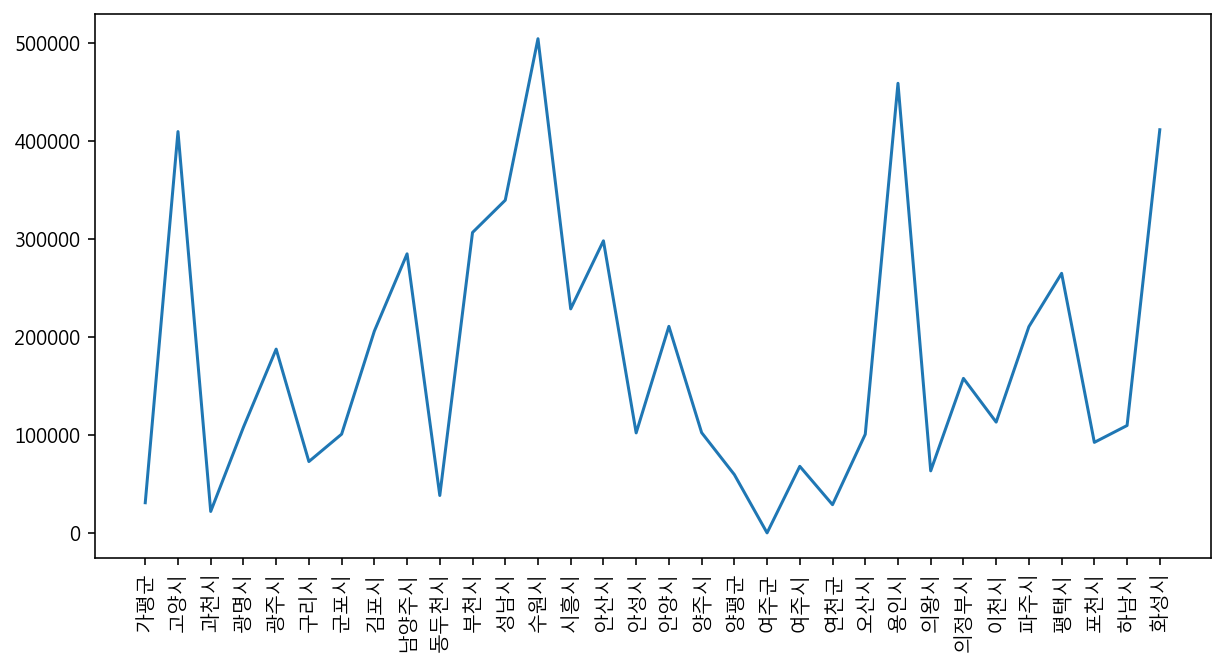

In [12]:
plt.figure(figsize=(10,5))

plt.plot(df2_pivot.index,df2_pivot['총계'])
plt.xticks(rotation=90)
plt.show()

In [13]:
df3=pd.read_csv('../day10/주민등록인구집계현황.csv',encoding='euc-kr')

In [14]:
df3.head(1)

,연도,월,행정구역구분명,행정구역명,총 인구수,0~9세,10~19세,20~29세,30~39세,40~49세,...,10~19세 (여),20~29세 (여),30~39세 (여),40~49세 (여),50~59세 (여),60~69세 (여),70~79세 (여),80~89세 (여),90~99세 (여),100세 이상 (여)
0,2020,5,도,경기도,13324041,1169656,1341519,1788779,1916581,2294087,...,650670,847756,930618,1128827,1092886,731796,411182,215062,37971,3043


In [15]:
df4=df3[(df3['연도']==2020)&(df3['월']==5)&(df3['행정구역구분명']=='시군')][['행정구역명','총 인구수']]

In [16]:
df4['행정구역명']=df4['행정구역명'].str.replace('경기도 ','').str.strip()

In [17]:
df2.columns

Index(['시군명', '총계'], dtype='object')

In [18]:
df4.columns

Index(['행정구역명', '총 인구수'], dtype='object')

In [19]:
df2_pivot.index

Index(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시',
       '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주군',
       '여주시', '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시',
       '하남시', '화성시'],
      dtype='object', name='시군명')

In [20]:
df4=df4.set_index('행정구역명')

In [21]:
df4.index

Index(['가평군', '고양시', '과천시', '광명시', '광주시', '구리시', '군포시', '김포시', '남양주시', '동두천시',
       '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '안양시', '양주시', '양평군', '여주시',
       '연천군', '오산시', '용인시', '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시',
       '화성시'],
      dtype='object', name='행정구역명')

In [22]:
df_total=df2_pivot.merge(df4,left_index=True,right_index=True)

In [23]:
df_total['차/인구수']=df_total['총계']/df_total['총 인구수']*100

In [24]:
df_total

,총계,총 인구수,차/인구수
가평군,30793,62566,49.216827
고양시,409589,1076179,38.059561
과천시,21890,60790,36.009212
광명시,107851,314413,34.302335
광주시,187575,376753,49.787261
구리시,72824,198883,36.616503
군포시,100795,275902,36.532899
김포시,205944,447038,46.068567
남양주시,284816,706444,40.316855
동두천시,38187,94097,40.582590


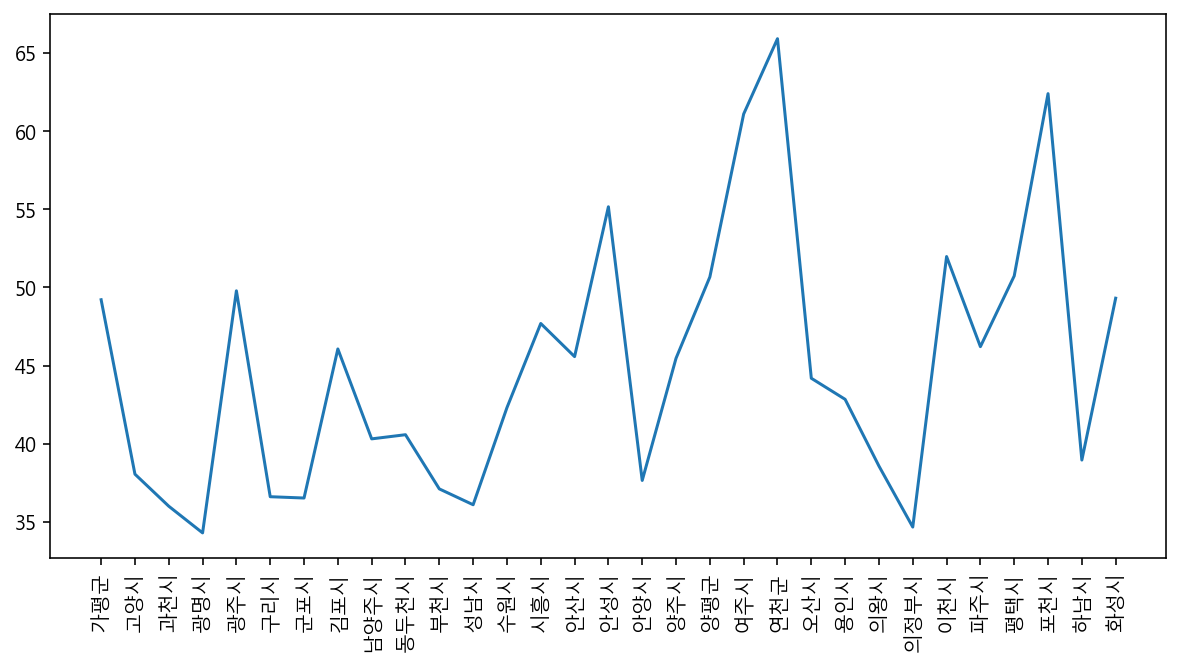

In [25]:
plt.figure(figsize=(10,5))

plt.plot(df_total.index,df_total['차/인구수'])
plt.xticks(rotation=90)
plt.show()

In [26]:
df5=pd.read_csv('교통사고집계현황.csv',encoding='euc-kr')

In [27]:
df5.head(2)

,집계년도,시군명,발생건수(건),사망자수(명),부상자수(명)
0,2018,가평군,380,11,682
1,2018,고양시,3950,38,5889


In [28]:
df5['집계년도'].unique()

array([2018, 2017, 2015, 2014, 2013], dtype=int64)

In [29]:
df5=df5[df5['집계년도']==2018]

In [30]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   집계년도     31 non-null     int64 
 1   시군명      31 non-null     object
 2   발생건수(건)  31 non-null     int64 
 3   사망자수(명)  31 non-null     int64 
 4   부상자수(명)  31 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 1.5+ KB


In [31]:
df5=df5.set_index('시군명')

In [32]:
df5

,집계년도,발생건수(건),사망자수(명),부상자수(명)
시군명,,,,
가평군,2018,380,11,682
고양시,2018,3950,38,5889
과천시,2018,239,1,385
광명시,2018,1076,12,1520
광주시,2018,1691,19,2622
구리시,2018,668,11,966
군포시,2018,659,7,954
김포시,2018,1682,24,2664
남양주시,2018,2431,41,3903


In [33]:
df_total=df_total.merge(df5,left_index=True,right_index=True)

In [34]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 가평군 to 화성시
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   총계       31 non-null     int64  
 1   총 인구수    31 non-null     int64  
 2   차/인구수    31 non-null     float64
 3   집계년도     31 non-null     int64  
 4   발생건수(건)  31 non-null     int64  
 5   사망자수(명)  31 non-null     int64  
 6   부상자수(명)  31 non-null     int64  
dtypes: float64(1), int64(6)
memory usage: 3.2+ KB


In [35]:
df_total=df_total.drop('집계년도',axis=1)

In [36]:
df_total

,총계,총 인구수,차/인구수,발생건수(건),사망자수(명),부상자수(명)
가평군,30793,62566,49.216827,380,11,682
고양시,409589,1076179,38.059561,3950,38,5889
과천시,21890,60790,36.009212,239,1,385
광명시,107851,314413,34.302335,1076,12,1520
광주시,187575,376753,49.787261,1691,19,2622
구리시,72824,198883,36.616503,668,11,966
군포시,100795,275902,36.532899,659,7,954
김포시,205944,447038,46.068567,1682,24,2664
남양주시,284816,706444,40.316855,2431,41,3903
동두천시,38187,94097,40.582590,406,11,576


In [37]:
df_total['교통사고/차']=df_total['발생건수(건)']/df_total['총계']*100

In [38]:
df_total=df_total.sort_values('사망자수(명)')

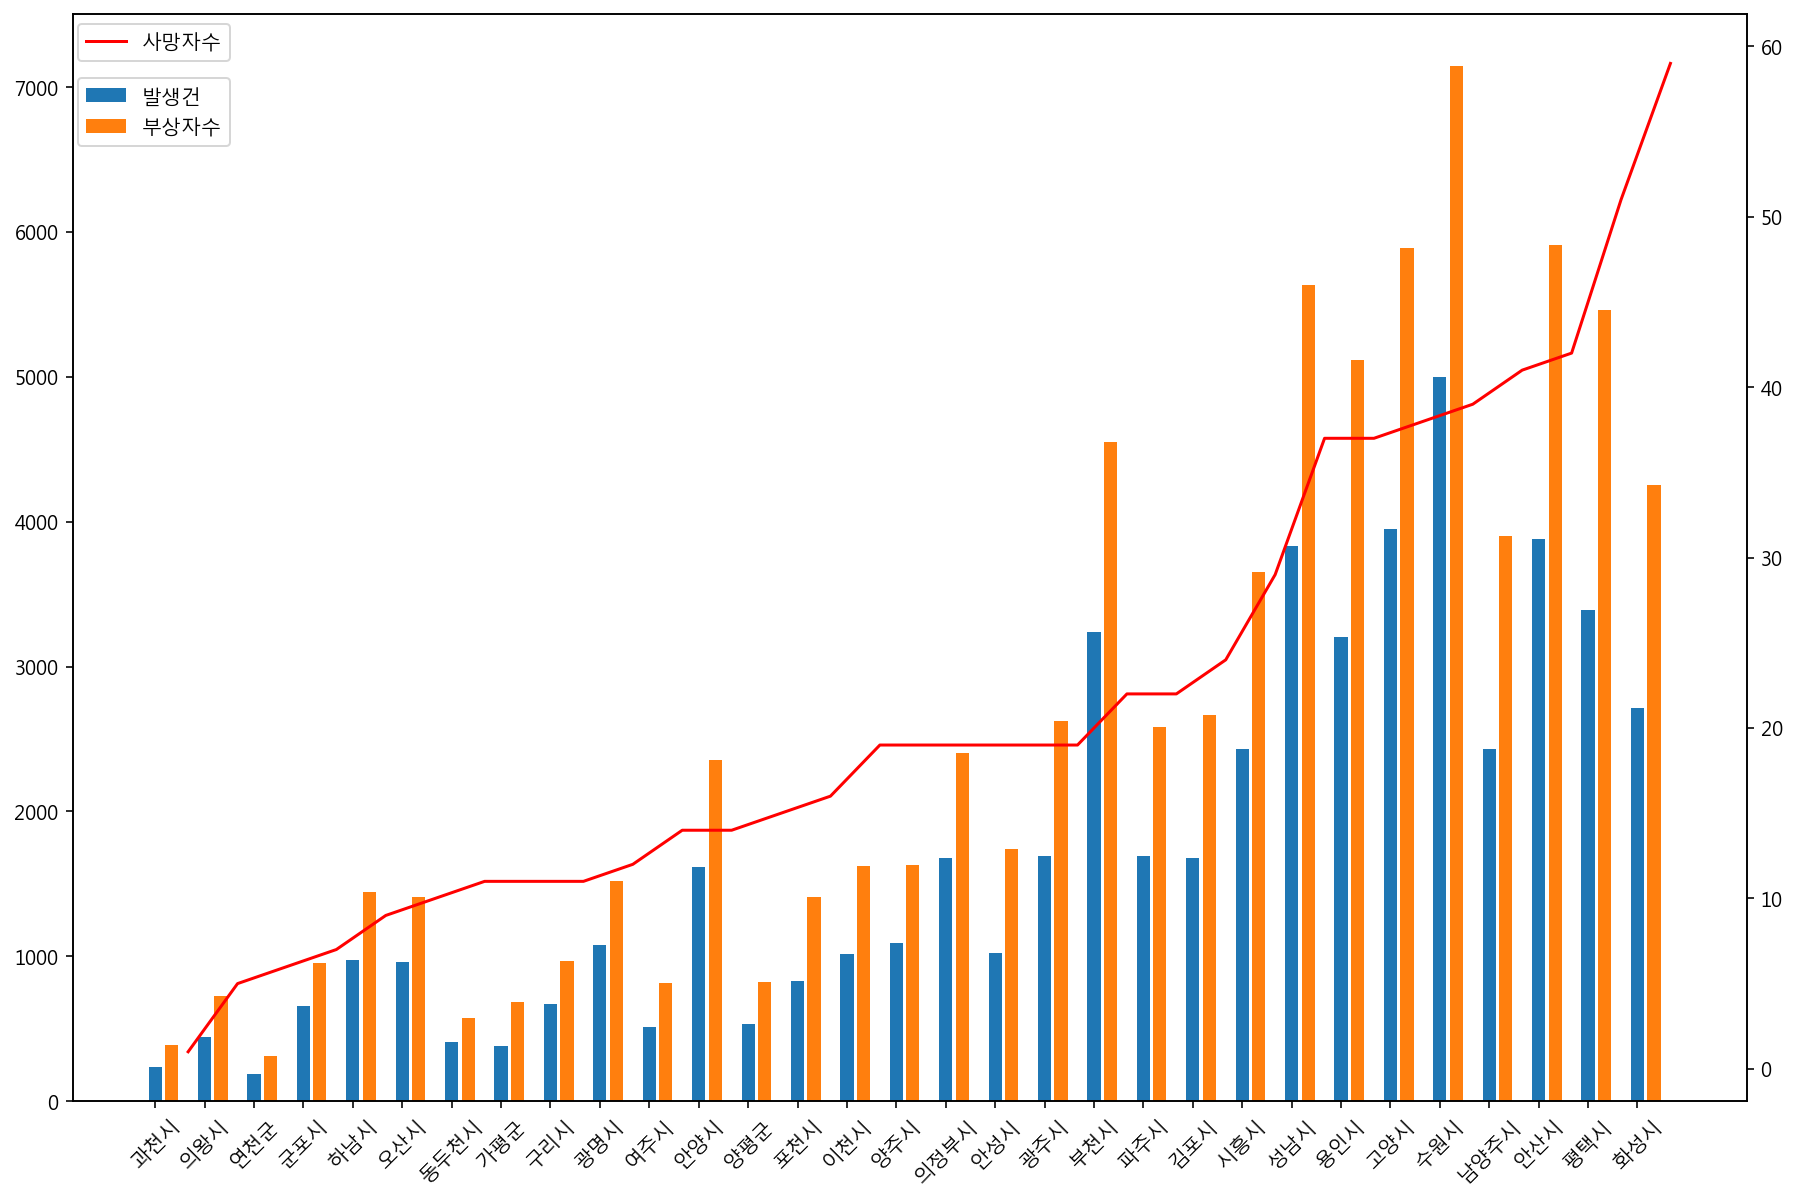

In [39]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot()
ax1.bar([x*3 for x in range(31)],df_total['발생건수(건)'],tick_label=df_total.index)
ax1.bar([x*3+1 for x in range(31)],df_total['부상자수(명)'])
ax2=ax1.twinx()
ax2.plot([x*3+2 for x in range(31)],df_total['사망자수(명)'],color='red')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.legend(['발생건','부상자수'],bbox_to_anchor =(0.1,0.95))
ax2.legend(['사망자수'],bbox_to_anchor =(0.1,1))
plt.show()

In [40]:
df_total=df_total.sort_values('총계')

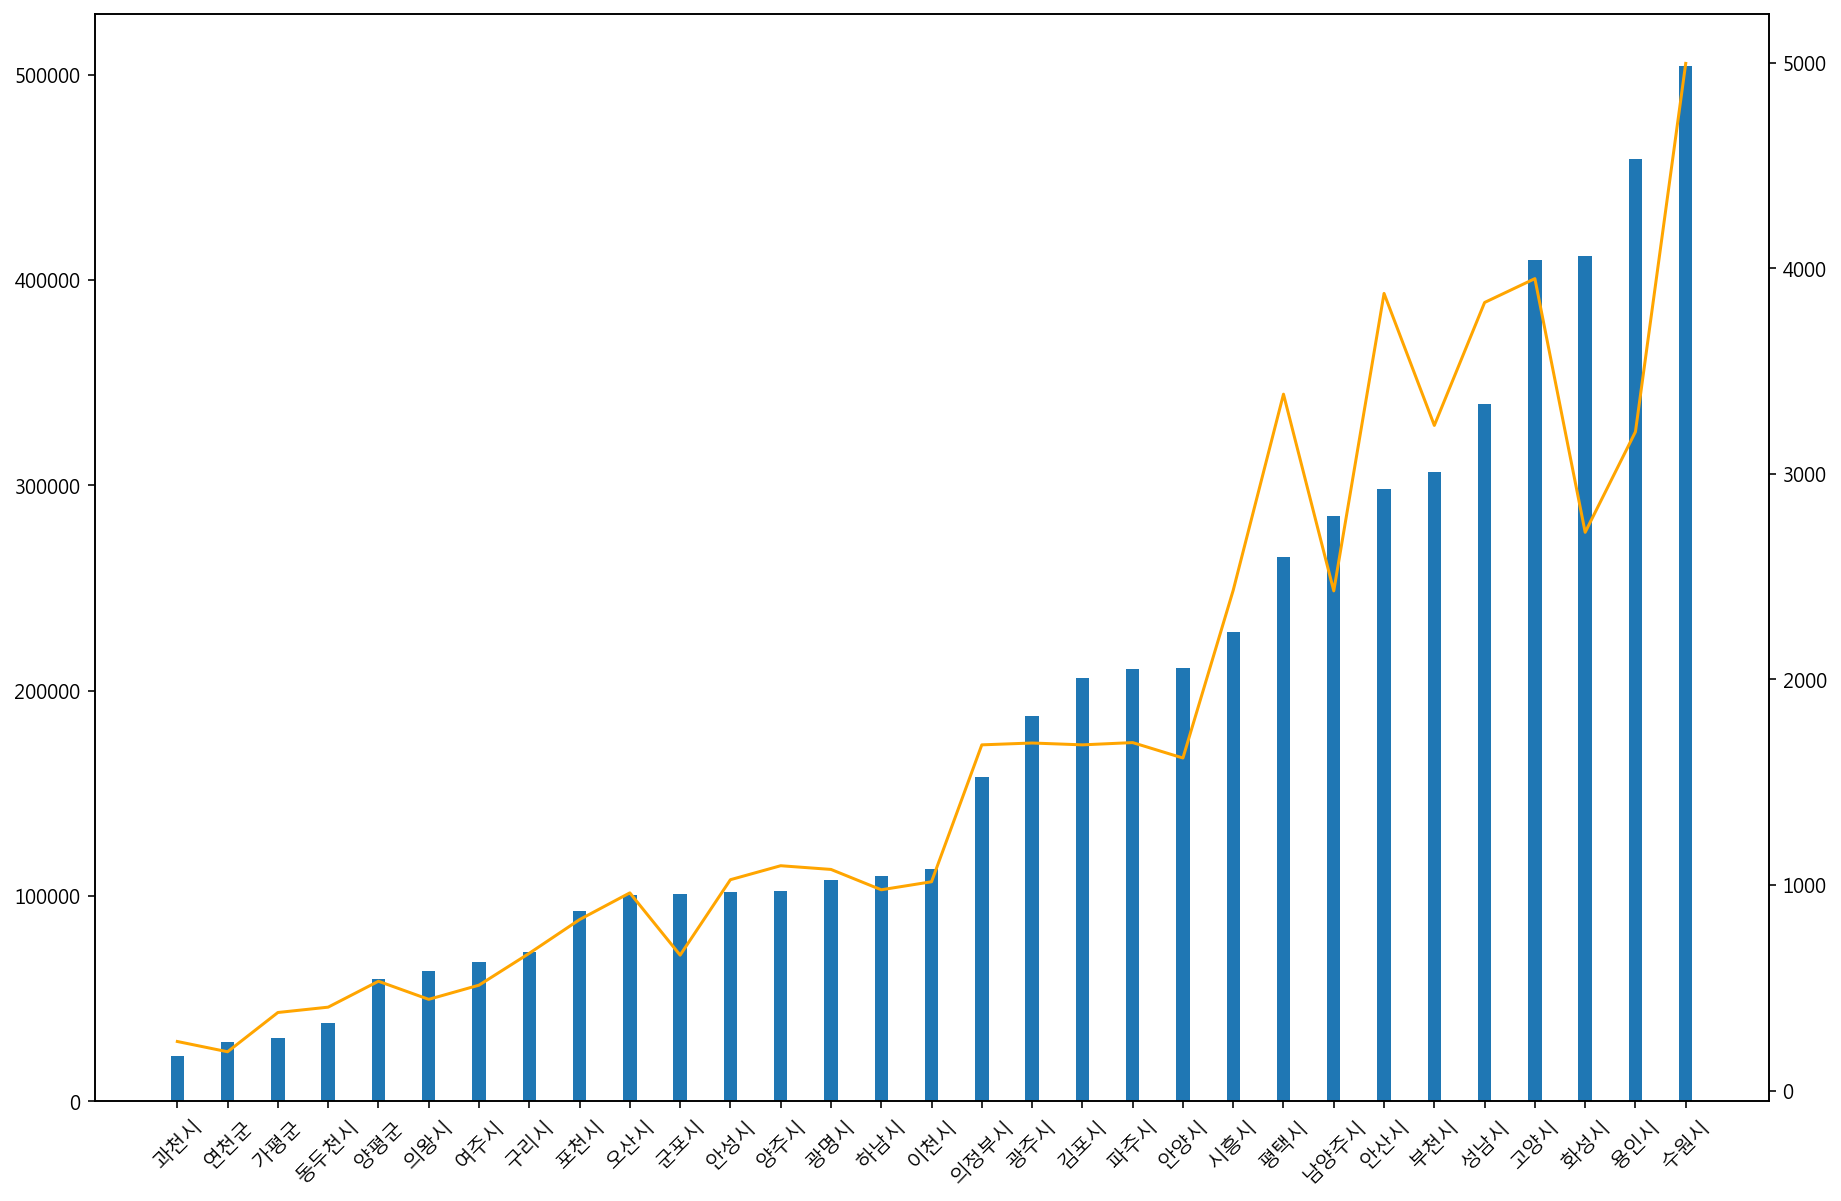

In [41]:
fig=plt.figure(figsize=(15,10))
ax1=plt.subplot()
ax1.bar([x*3 for x in range(31)],df_total['총계'],tick_label=df_total.index)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax2=ax1.twinx()
ax2.plot([x*3 for x in range(31)],df_total['발생건수(건)'],color='orange')
plt.show()

In [42]:
# shutil.move('C:/Users/i7B/Downloads/CCTV현황(개방표준).csv','CCTV현황(개방표준).csv')

In [43]:
df_a=pd.read_csv('CCTV현황(개방표준).csv',encoding='euc-kr')

In [44]:
df_a.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,경기도 가평군청,경기도 가평군 가평읍 당목가일길 211-80,경기도 가평군 가평읍 개곡리 705번지,생활방범,4,200.0,120도,30.0,NaN,031-582-1191,37.870545,127.5376575,2019-05-10
1,경기도 가평군청,NaN,경기도 가평군 가평읍 개곡리 964(개곡교),생활방범,2,200.0,도로방면,30.0,NaN,031-580-2571,37.864426,127.5301553,2019-05-10
2,경기도 가평군청,NaN,경기도 가평군 가평읍 개곡리 산 334(경춘공원),쓰레기단속,1,200.0,360도전방면,30.0,NaN,031-580-2550,37.834013,127.5063827,2019-05-10
3,경기도 가평군청,NaN,경기도 가평군 가평읍 개곡리 산 344(줄길리 마을입구),생활방범,2,200.0,도로방면,30.0,NaN,031-580-2571,37.848283,127.5498354,2019-05-10
4,경기도 가평군청,NaN,경기도 가평군 가평읍 경반리 산 151-3(짚라인가평입구),생활방범,1,200.0,도로방면,30.0,NaN,031-580-2571,37.834490,127.4663768,2019-05-10


In [45]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37969 entries, 0 to 37968
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   관리기관명     37969 non-null  object 
 1   소재지도로명주소  22904 non-null  object 
 2   소재지지번주소   37849 non-null  object 
 3   설치목적구분    37969 non-null  object 
 4   카메라대수     37969 non-null  int64  
 5   카메라화소수    34121 non-null  float64
 6   촬영방면정보    32497 non-null  object 
 7   보관일수      35259 non-null  float64
 8   설치년월      24283 non-null  object 
 9   관리기관전화번호  37969 non-null  object 
 10  위도        37937 non-null  float64
 11  경도        37937 non-null  object 
 12  데이터기준일자   37969 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 3.8+ MB


In [46]:
df_a['관리기관명'].unique()

array(['경기도 가평군청', '경기도 고양시', '경기도 과천시청', '경기도 광명시 재해방재과',
       '경기도 광명시 도시교통과', '경기도 광명시 정보통신과', '경기도 광명시 공원녹지과', '경기도 광명시 기업경제과',
       '경기도 광명시 지도민원과', '경기도 광주시청', '경기도 구리시청', '경기도구리시청', '경기도 군포시청',
       '김포시 정보통신과', '김포시 안전총괄과', '김포시 교통과', '김포시 환경과', '경기도 남양주시청',
       '경기도 동두천시청', '경기도 부천시청', '경기도 성남시청', '경기도 수원시 도시안전통합센터',
       '경기도 수원시 기후대기과', '경기도 시흥시청', '안산시청', '경기도 안성시청', '경기도 안양시 (건축과)',
       '경기도 안양시 (대중교통과)', '경기도 안양시청(교통정책과)', '경기도 안양시 (교통정책과)',
       '경기도 안양시 평촌도서관', '경기도 안양시 (가족여성과)', '경기도 안양시 (총무과)',
       '경기도 안양시 (안전총괄과)', '경기도 안양시 (정보통신과)', '경기도 안양시 (청소행정과)',
       '경기도 안양시 (하천관리과)', '경기도 안양시 도로과', '경기도 안양시 평촌도서관(벌말분관)',
       '경기도 안양시 평촌도서관(관양분관)', '경기도 안양시 평촌도서관(비산분관)',
       '경기도 안양시 평촌도서관(호계분관)', '경기도 안양시 평촌도서관(어린이분관)', '양주시청',
       '회천1동 행정복지센터', '광적면 행정복지센터', '양주시 평생교육진흥원(덕정도서관)',
       '양주시 평생교육진흥원(고읍도서관)', '남면 행정복지센터', '양주시 평생교육진흥원(양주 희망도서관)',
       '경기도 양평군청', '경기도 여주시', 'CCTV통합관제센터', '연천군청 지역경제과', '경기도 오산시청',
       '용인시', '경기도 의왕시청', '경

In [47]:
df_a['소재지지번주소'].isna().sum()

120

In [48]:
df_a[df_a['소재지지번주소'].isna()]

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
4020,경기도 군포시청,당정동 1014-2,NaN,다목적,4,NaN,360도 회전,30.0,NaN,031-399-7911,37.343368,126.9491189349,2019-06-04
4021,경기도 군포시청,당정동 1020-1,NaN,다목적,3,NaN,360도 회전,30.0,NaN,031-399-7911,37.340782,126.9494254703,2019-06-04
4024,경기도 군포시청,당정동 181-5,NaN,다목적,1,NaN,360도 회전,30.0,NaN,031-399-7911,37.356975,126.9527550304,2019-06-04
4027,경기도 군포시청,당정동751-1,NaN,다목적,3,NaN,360도 회전,30.0,NaN,031-399-7911,37.343809,126.9480352283,2019-06-04
4047,경기도 군포시청,당정동 1012-2,NaN,다목적,3,NaN,360도 회전,30.0,NaN,031-399-7911,37.342728,126.9500673454,2019-06-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33220,경기도 하남시청,경기도 하남시 대청로 22번길 555도 하남리빙텔 주변도로,NaN,교통단속,1,41.0,NaN,NaN,2018-06,031-790-6293,NaN,NaN,2018-08-29
33221,경기도 하남시청,경기도 하남시 덕풍서로 780 도 명성교회 주변도로,NaN,교통단속,1,41.0,NaN,NaN,2018-06,031-790-6293,NaN,NaN,2018-08-29
33564,경기도 하남시청,경기도 하남시 스타필드하남 정문 앞 (신장동 54-60),NaN,교통단속,1,200.0,NaN,NaN,2018-06,031-790-6293,NaN,NaN,2018-08-29
33569,경기도 하남시청,경기도 하남시 구산유치원 주변도로,NaN,교통단속,1,200.0,NaN,NaN,2018-10,031-790-6293,NaN,NaN,2018-08-29


In [49]:
df_a['관리기관명']=df_a['관리기관명'].str.replace("경기도 ",'')

In [50]:
df_a['시군']=df_a['소재지지번주소'].str[4:7]

In [51]:
pivot_a=df_a.pivot_table(values='카메라대수',index='관리기관명',aggfunc='sum')

In [52]:
pivot_a.head(30)

,카메라대수
관리기관명,
CCTV통합관제센터,540
가평군청,1283
경기도구리시청,18
고양시,4509
과천시청,982
광명시 공원녹지과,253
광명시 기업경제과,83
광명시 도시교통과,357
광명시 재해방재과,31


In [53]:
df_a['소재지지번주소'].isna().sum()

120

In [54]:
indexs=df_a[df_a['시군'].isna()].index

Int64Index([ 4020,  4021,  4024,  4027,  4047,  4049,  4050,  4091,  4094,
             4096,
            ...
            33122, 33191, 33194, 33211, 33215, 33220, 33221, 33564, 33569,
            33686],
           dtype='int64', length=120)

['101',
 '102',
 '181',
 '51-',
 '101',
 '761',
 '761',
 '973',
 '05-',
 '137',
 '72-',
 '181',
 '181',
 '181',
 '181',
 '7-1',
 '908',
 '638',
 '967',
 '36-',
 '1-5',
 '62-',
 '80-',
 '49',
 '150',
 '111',
 '154',
 '150',
 '181',
 '05-',
 '71-',
 '34-',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '부천시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '안양시',
 '의정부',
 '의정부',
 '의정부',
 '의정부',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '포천시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시',
 '하남시']

In [57]:
for i in range(120):
    if ('시' in siguns[i] or '군' in siguns[i]) and ' ' not in siguns[i]:
        df_a.loc[indexs[i],'시군']=siguns[i]

In [58]:
indexs2=df_a[df_a['시군'].isna()].index

In [59]:
len(indexs2)

36

In [60]:
# for x in range(36):
#     df_a.loc[indexs[i],'시군']=df_a.loc[indexs[i],'관리기관명'][:-1]

In [61]:
df_a['시군'].unique()

array(['가평군', '고양시', '과천시', '안양시', '광명시', '시 금', '광주시', '구리시', '남양주',
       '군포시', nan, '김포시', '동두천', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시',
       '양주시', '양평군', '여주시', '연천군', '파주시', '포천시', '오산시', '용인시', '의왕시',
       '의정부', '이천시', '평택시', '하남시', '화성시'], dtype=object)

In [62]:
df_a[df_a['시군']=='시 금']

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자,시군
1918,광명시 정보통신과,서울시 독산동 범안로,서울특별시 금천구 독산동 664-7 (금천교 진입),차량방범,3,500.0,차량방범42 90도 진입방향,30.0,2012-08,02-2680-6500,37.464326,126.8844786,2019-09-09,시 금
2016,광명시 정보통신과,경기도 광명시 범안로,서울특별시 금천구 독산동 664-7 (금천교 진출),차량방범,3,500.0,차량방범43 90도 진입방향,30.0,2012-08,02-2680-6500,37.464326,126.8844786,2019-09-09,시 금
2067,광명시 도시교통과,서울시 금천교 사거리,서울특별시 금천구 독산동 1083-1 금천교,교통정보수집,3,200.0,교통정보[3] 360도 전방면,30.0,2014-10,02-2680-6513,37.464965,126.8834603,2019-09-09,시 금


In [63]:
df_a.drop(df_a[df_a['시군']=='시 금'].index,inplace=True)

In [64]:
df_a['시군'].unique()

array(['가평군', '고양시', '과천시', '안양시', '광명시', '광주시', '구리시', '남양주', '군포시', nan,
       '김포시', '동두천', '부천시', '성남시', '수원시', '시흥시', '안산시', '안성시', '양주시',
       '양평군', '여주시', '연천군', '파주시', '포천시', '오산시', '용인시', '의왕시', '의정부',
       '이천시', '평택시', '하남시', '화성시'], dtype=object)

In [65]:
pivot_a=df_a.pivot_table(index='시군',values='카메라대수',aggfunc='sum')
pivot_a

,카메라대수
시군,
가평군,1283
고양시,4511
과천시,980
광명시,2291
광주시,2393
구리시,1450
군포시,2737
김포시,4502
남양주,5941


In [66]:
df_total2=df_total.merge(pivot_a,left_index=True,right_index=True)

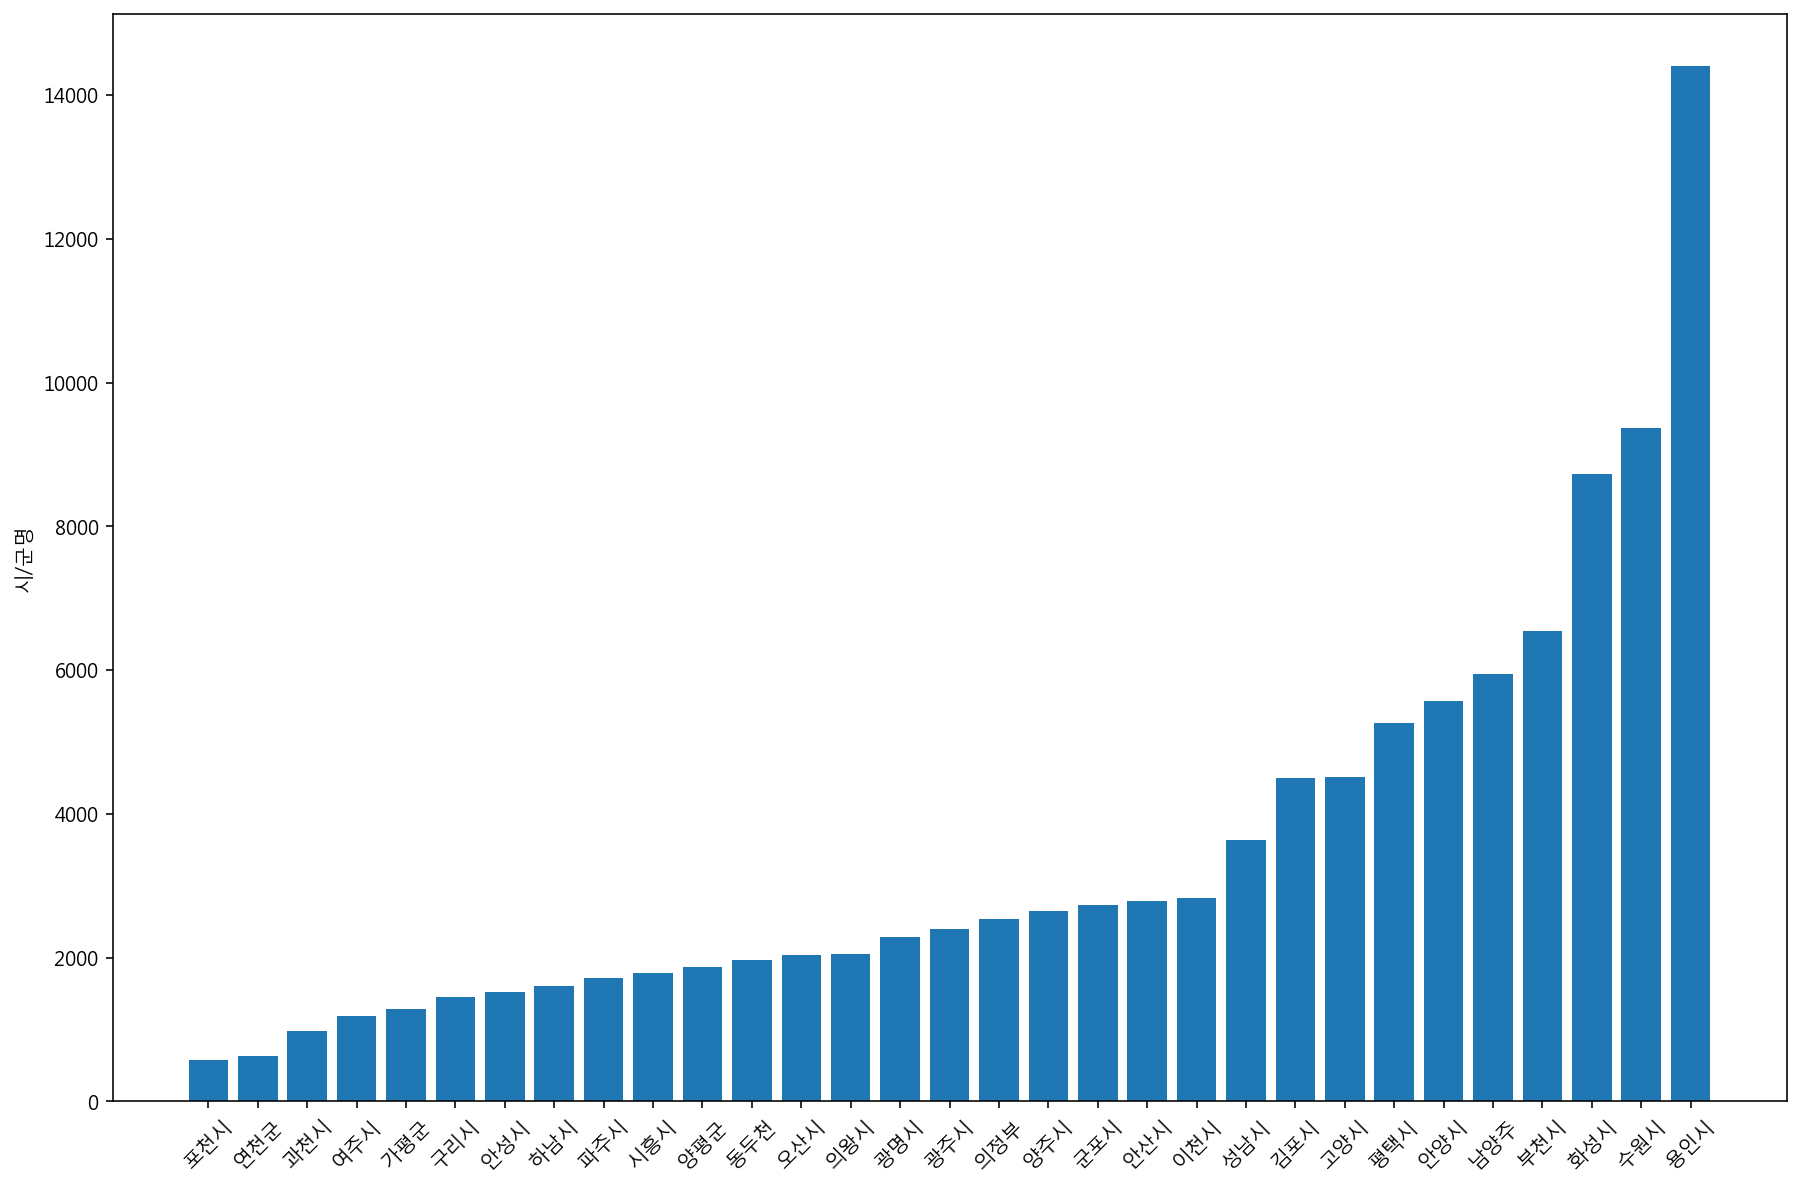

In [67]:
pivot_a=pivot_a.sort_values('카메라대수')
plt.figure(figsize=(15,10))
plt.bar(data=pivot_a,x=pivot_a.index,height=pivot_a['카메라대수'])
plt.xticks(rotation=45)
plt.ylabel('카메라수')
plt.ylabel('시/군명')
plt.show()

In [68]:
df_total.head()

,총계,총 인구수,차/인구수,발생건수(건),사망자수(명),부상자수(명),교통사고/차
과천시,21890,60790,36.009212,239,1,385,1.091823
연천군,28797,43689,65.913617,189,6,313,0.656318
가평군,30793,62566,49.216827,380,11,682,1.234047
동두천시,38187,94097,40.582590,406,11,576,1.063189
양평군,59519,117456,50.673444,532,15,826,0.893832


In [69]:
df_total2['카메라/인구']=df_total2['카메라대수']/df_total2['총 인구수']
df_total2=df_total2.sort_values('카메라/인구')

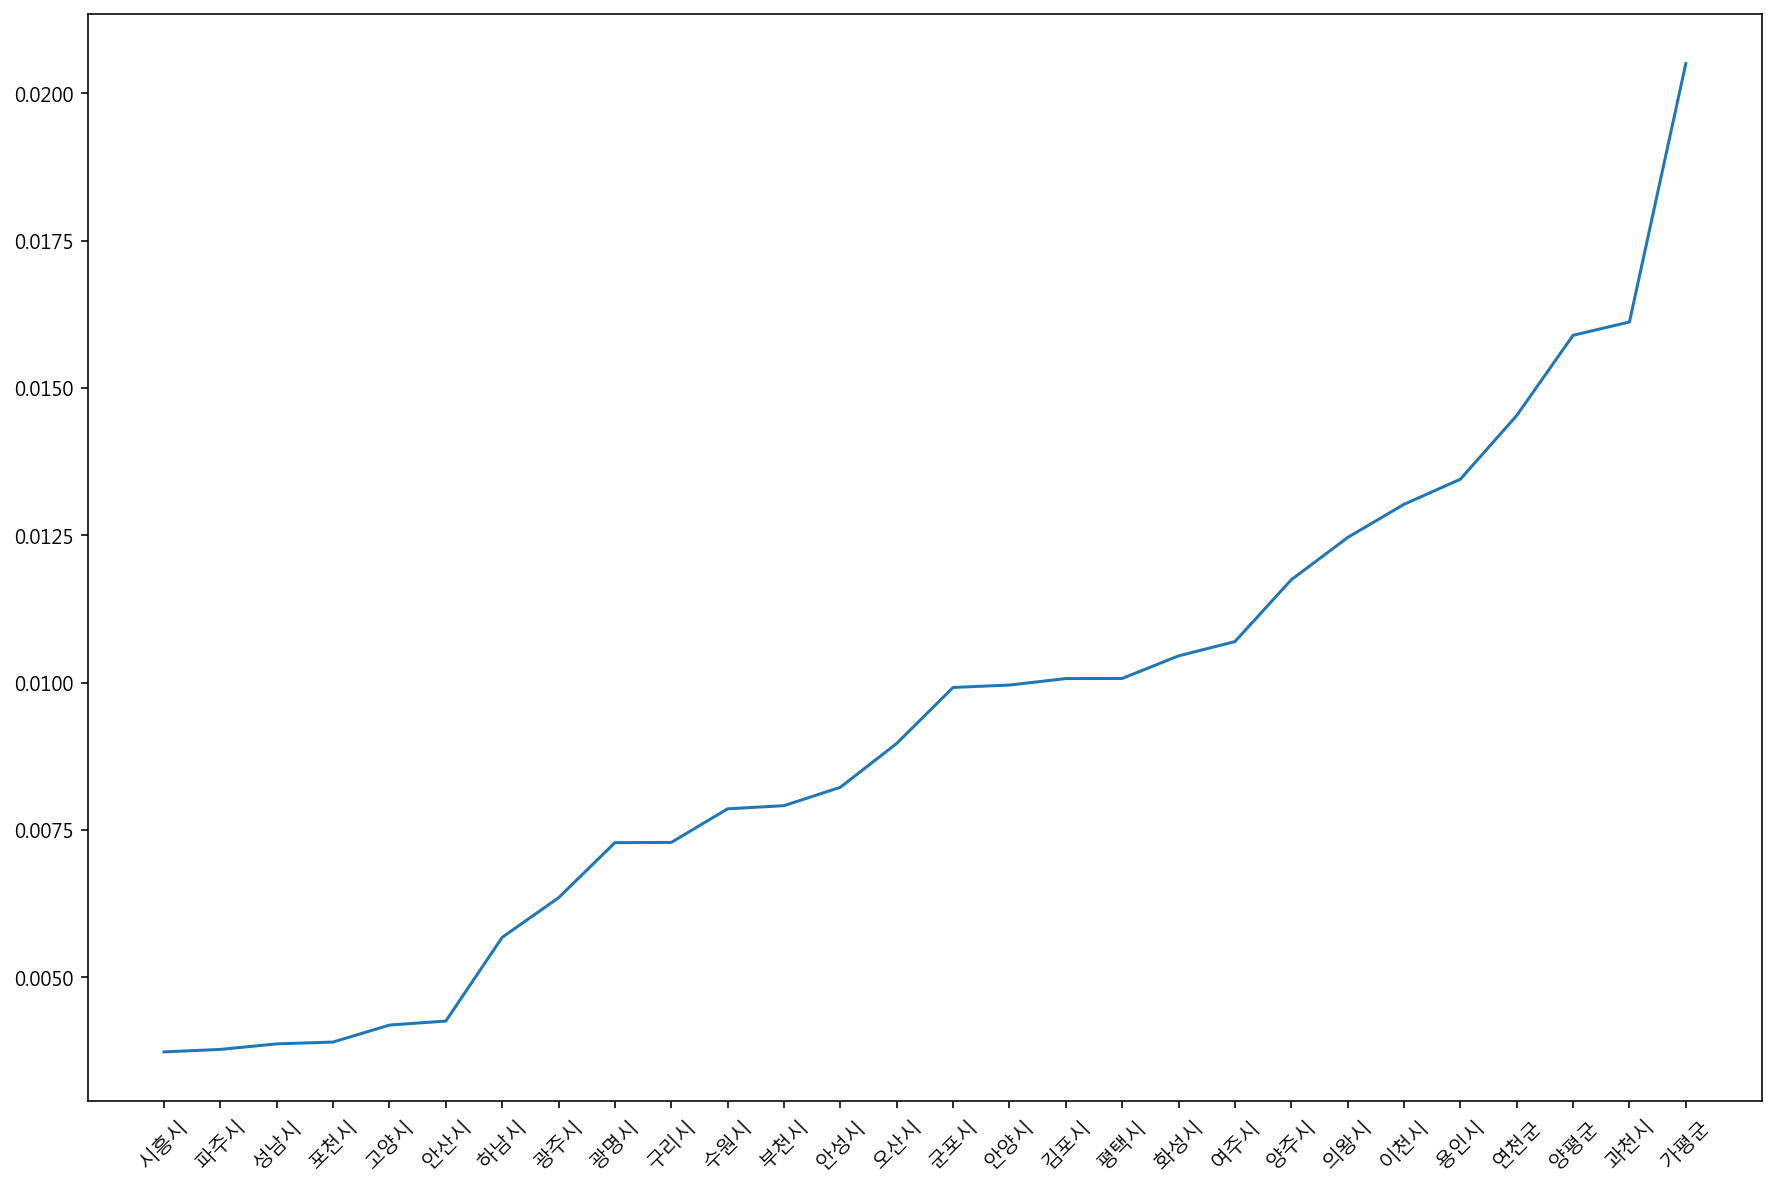

In [70]:
plt.figure(figsize=(15,10))
plt.plot(df_total2.index,df_total2['카메라/인구'])
plt.xticks(rotation=45)
plt.show()

In [98]:
import json
import folium

try:
    geo_data=json.load(open('../day05/경기도행정구역경계.json', encoding="utf-8"))
except:
    geo_data=json.load(open('../day05/경기도행정구역경계.json', encoding="utf-8-sig"))

g_map = folium.Map(location=[37.5502, 126.982], 
                   zoom_start=11)
folium.Choropleth(geo_data=geo_data,
                 data=df_for_map['총계'],
                 columns=[df_for_map.index, df_for_map['총계']],
                 fill_color='YlOrRd',
                 fill_opacity=0.7,
                 line_opacity=0.3,
                 key_on='feature.properties.name'
                 ).add_to(g_map)
g_map

In [96]:
df_for_map

,시군명,승용(관용),승용(자가용),승용(영업용),승용(관용+자가용+영업용),승합(관용),승합(자가용),승합(영업용),승합(관용+자가용+영업용),화물(관용),...,화물(영업용),화물(관용+자가용+영업용),특수(관용),특수(자가용),특수(영업용),특수(관용+자가용+영업용),관용 자동차(승용+승합+화물+특수) 등록대수,자가용 자동차(승용+승합+화물+특수) 등록대수,영업용 자동차(승용+승합+화물+특수) 등록대수,총계
시군구명,,,,,,,,,,,,,,,,,,,,,
가평군,가평군,132,22020,203,22355,84,1397,250,1731,144,...,159,6582,9,71,45,125,369,29767,657,30793
고양시일산서구,고양시,67,99718,2147,101932,37,2807,569,3413,34,...,1201,10722,1,97,103,201,139,112109,4020,116268
고양시일산동구,고양시,97,102332,3743,106172,92,3217,881,4190,85,...,1848,14616,11,117,175,303,285,118349,6647,125281
고양시덕양구,고양시,280,139234,1165,140679,195,5199,406,5800,211,...,2081,21199,18,147,197,362,704,163487,3849,168040
과천시,과천시,470,18170,327,18967,110,627,20,757,114,...,239,2117,21,17,11,49,715,20578,597,21890
광명시,광명시,112,88015,1719,89846,82,3579,506,4167,109,...,1787,13603,10,78,147,235,313,103379,4159,107851
광주시,광주시,151,143899,836,144886,73,6070,2949,9092,129,...,4043,33042,12,235,308,555,365,179074,8136,187575
구리시,구리시,73,58547,1112,59732,67,2205,290,2562,90,...,1075,10309,11,79,131,221,241,69975,2608,72824
군포시,군포시,120,83094,769,83983,66,2882,177,3125,98,...,3769,13231,7,81,368,456,291,95421,5083,100795


In [97]:
df_for_map.index.unique()

Index(['가평군', '고양시일산서구', '고양시일산동구', '고양시덕양구', '과천시', '광명시', '광주시', '구리시',
       '군포시', '김포시', '남양주시', '동두천시', '부천시오정구', '부천시소사구', '부천시', '부천시원미구',
       '성남시분당구', '성남시중원구', '성남시수정구', '수원시장안구', '수원시권선구', '수원시팔달구', '수원시영통구',
       '시흥시', '안산시상록구', '안산시', '안산시단원구', '안성시', '안양시만안구', '안양시동안구', '양주시',
       '양평군', '여주군', '여주시', '연천군', '오산시', '용인시', '용인시처인구', '용인시기흥구', '용인시수지구',
       '의왕시', '의정부시', '이천시', '파주시', '평택시', '포천시', '하남시', '화성시'],
      dtype='object', name='시군구명')